In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

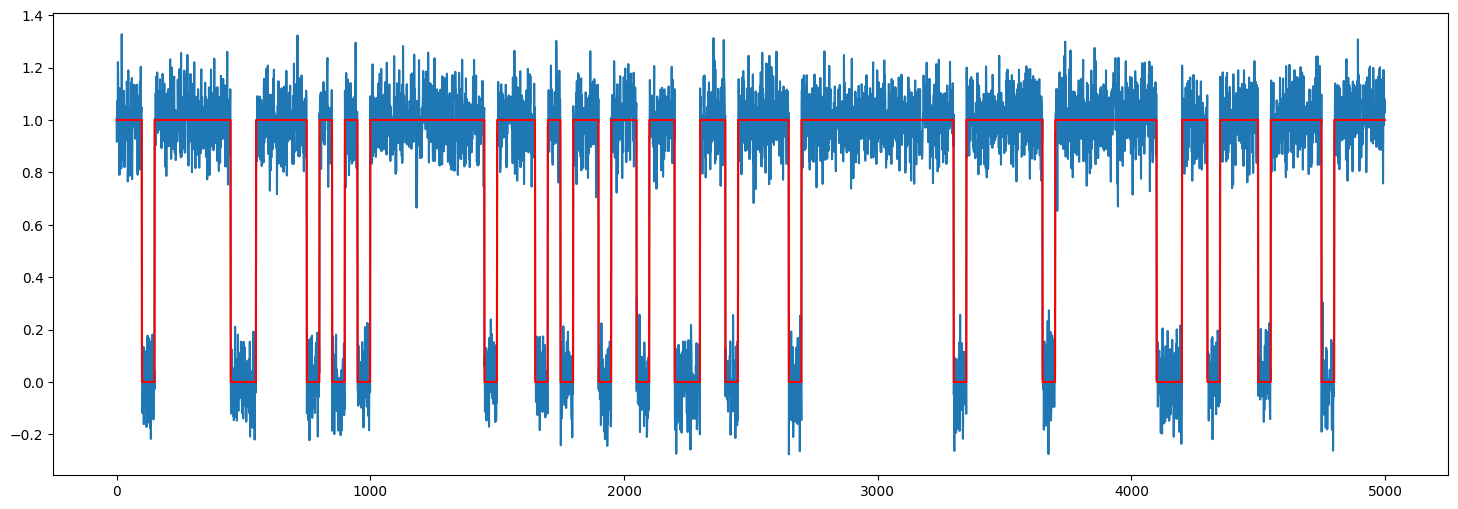

In [2]:
# Generación de datos simbólicos
a1 = 1       # Valor del símbolo a1
a0 = 0      # Valor del símbolo a0
Nsamples = 50  # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.2
p_1 = 1 - p_0

Nsymbols =100 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

# Genera una secuencia de símbolos basados en las probabilidades dadas
data = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
# Repite cada símbolo según el número de muestras por símbolo
data = np.concatenate([[v]*Nsamples for v in data])
message = data  # Almacena la secuencia completa en la variable 'message'

σ2 = 0.1  # Varianza del ruido
noise = np.random.normal(0, σ2, N)
messageNoise = message + noise

plt.figure(figsize=(18, 6))
plt.plot(messageNoise)
plt.plot(message,'r')
plt.show()

In [3]:
oculta1 = tf.keras.layers.Dense(units=10, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=10)
oculta3 = tf.keras.layers.Dense(units=10)
oculta4 = tf.keras.layers.Dense(units=10)
salida = tf.keras.layers.Dense(units=10)
modelo = tf.keras.Sequential([oculta1, oculta2, oculta3, salida])

In [4]:
'''modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=[1]),  # Primera capa oculta con ReLU
    tf.keras.layers.Dropout(0.2),  # Capa de Dropout para regularización
    tf.keras.layers.Dense(units=10, activation='relu'),  # Segunda capa oculta con ReLU
    tf.keras.layers.Dense(units=1)  # Capa de salida, sin función de activación para regresión
])'''

"modelo = tf.keras.Sequential([\n    tf.keras.layers.Dense(units=10, activation='relu', input_shape=[1]),  # Primera capa oculta con ReLU\n    tf.keras.layers.Dropout(0.2),  # Capa de Dropout para regularización\n    tf.keras.layers.Dense(units=10, activation='relu'),  # Segunda capa oculta con ReLU\n    tf.keras.layers.Dense(units=1)  # Capa de salida, sin función de activación para regresión\n])"

In [5]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=20, activation='relu'),  # Capa adicional
    tf.keras.layers.Dropout(0.01),  # Regularización adicional
    tf.keras.layers.Dense(units=10, activation='sigmoide'),
    #tf.keras.layers.Dropout(0.2),  # Regularización adicional
    #tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

modelo.compile(optimizer=tf.keras.optimizers.Adam(0.001),
               loss='mean_squared_error')


ValueError: Unknown activation function 'sigmoide' cannot be deserialized.

In [ ]:
# Definir el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=15, activation='relu', input_shape=[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=15, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

# Compilar el modelo
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.0005), loss='mean_squared_error')

In [ ]:
# Definir el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=15, activation='relu', input_shape=[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=15, activation='sigmoid'),
    tf.keras.layers.Dense(units=10)
])
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.0005), loss='mean_squared_error')

In [ ]:
# Definir un modelo más complejo y con regularización
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation='relu', input_shape=[1], kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compilar el modelo con un optimizador diferente y una tasa de aprendizaje más baja
modelo.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001), loss='mean_squared_error')



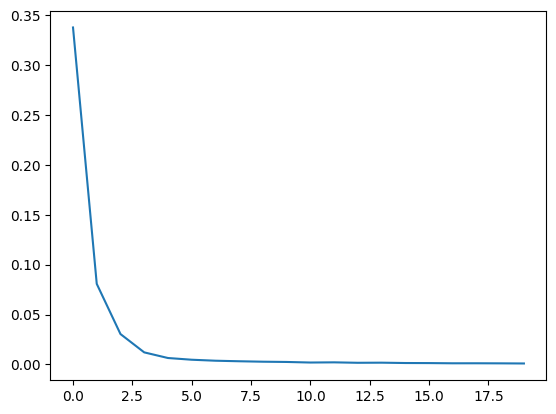

In [ ]:
historial = modelo.fit(messageNoise, message,epochs=20, verbose=False)
plt.plot(historial.history["loss"])

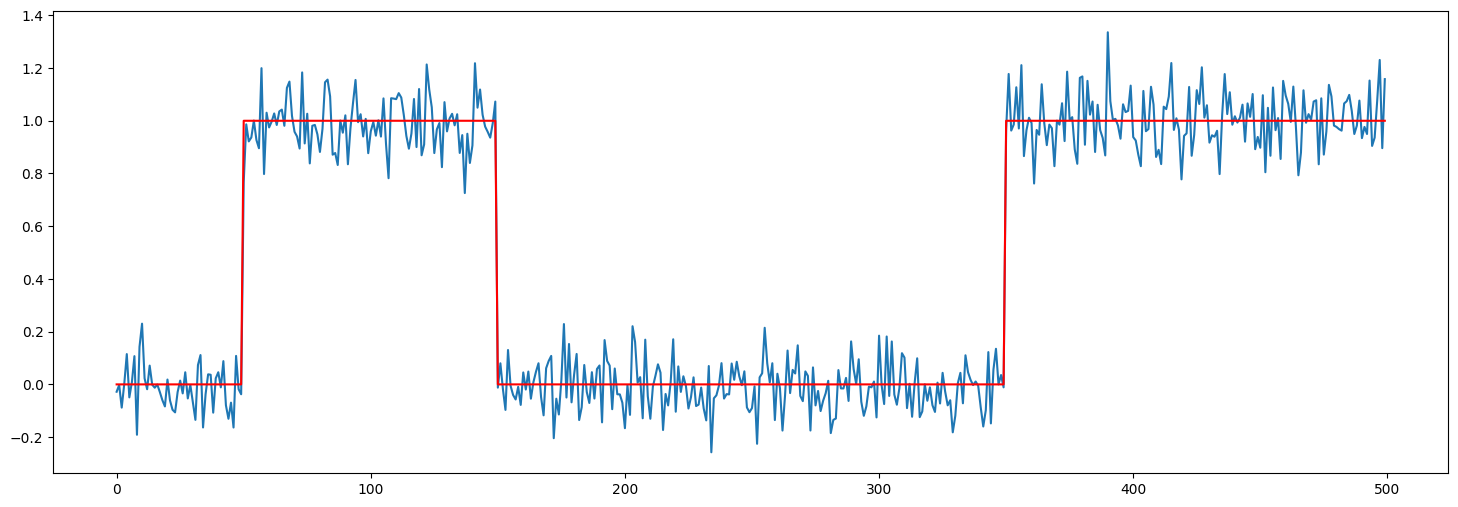

In [ ]:
# Generación de datos simbólicos
a1 = 1      # Valor del símbolo a1
a0 = 0      # Valor del símbolo a0
Nsamples = 50  # Muestras de tiempo por símbolo
# Probabilidades de los símbolos
p_0 = 0.8
p_1 = 1 - p_0
Nsymbols = 10 # Número total de símbolos
N = Nsymbols * Nsamples  # Número total de muestras

# Genera una secuencia de símbolos basados en las probabilidades dadas
data = np.random.choice([a0, a1], size=Nsymbols, p=[p_0, p_1])
# Repite cada símbolo según el número de muestras por símbolo
data = np.concatenate([[v]*Nsamples for v in data])
message1 = data  # Almacena la secuencia completa en la variable 'message'

σ2 = 0.1  # Varianza del ruido
noise1 = np.random.normal(0, σ2, N)
messageNoise1 = message1 + noise1

plt.figure(figsize=(18, 6))
plt.plot(messageNoise1)
plt.plot(message1,'r')
plt.show()

In [ ]:
resultado = modelo.predict(messageNoise1)

16/16 [==============================] - 0s 5ms/step


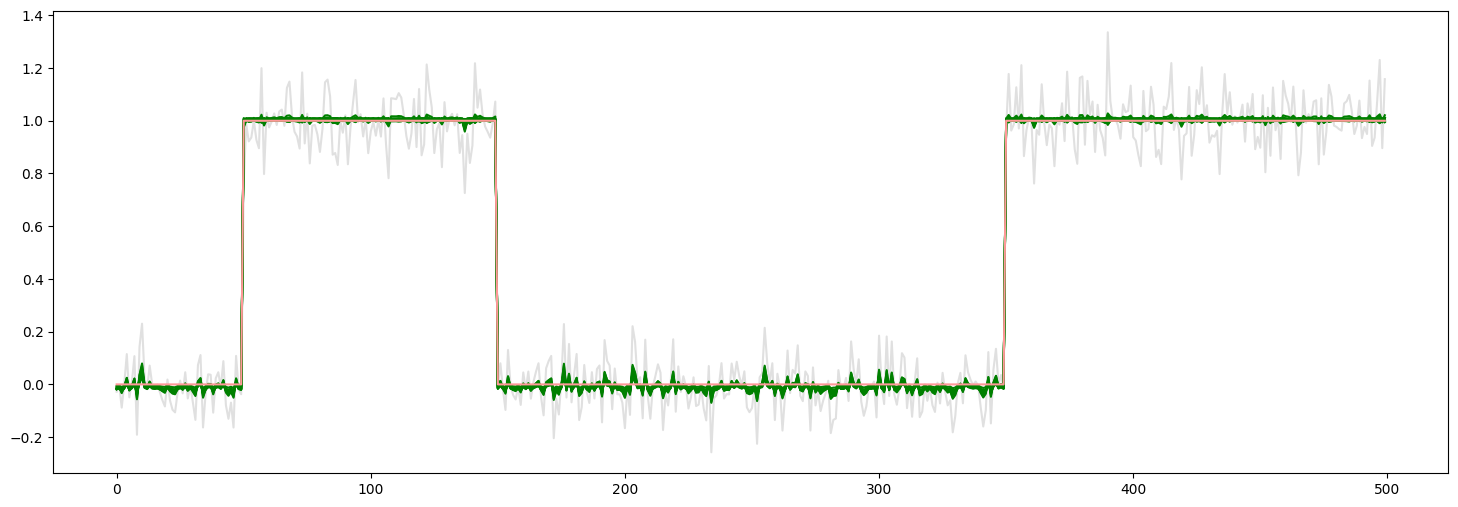

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(messageNoise1,color='#E0E0E0')
plt.plot(resultado,'g')
plt.plot(message1, color='#FF9999')
#plt.xlim(0,2000)

plt.show()

In [ ]:
resultado

array([[0.98921   , 0.99231684, 0.9848522 , ..., 0.98458916, 0.99421144,
        0.99973035],
       [0.98727727, 0.99496794, 0.98518366, ..., 0.99197835, 0.9956807 ,
        0.99634993],
       [0.98872983, 0.9915062 , 0.9842909 , ..., 0.9832547 , 0.99309754,
        0.9992826 ],
       ...,
       [0.00402229, 0.00140049, 0.00380383, ..., 0.00212636, 0.00538778,
        0.00314381],
       [0.00780468, 0.00403009, 0.00647697, ..., 0.00432757, 0.00999844,
        0.00651936],
       [0.00587985, 0.0026919 , 0.00511662, ..., 0.00320739, 0.0076521 ,
        0.00480156]], dtype=float32)

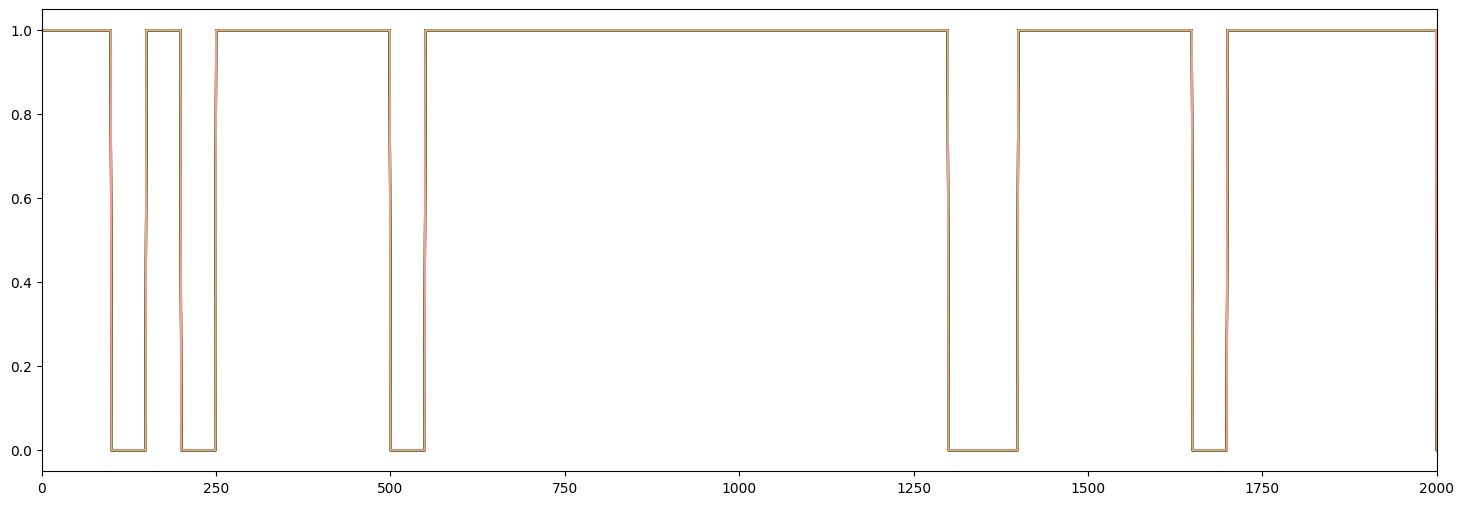

In [ ]:
resultado_umbralizado = np.where(resultado > 0.5, 1, 0)
plt.figure(figsize=(18, 6))
plt.plot(resultado_umbralizado,'g')
plt.plot(message1, color='#FF9999')
plt.xlim(0, 2000)
plt.show()

In [ ]:
resultado_umbralizado



array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

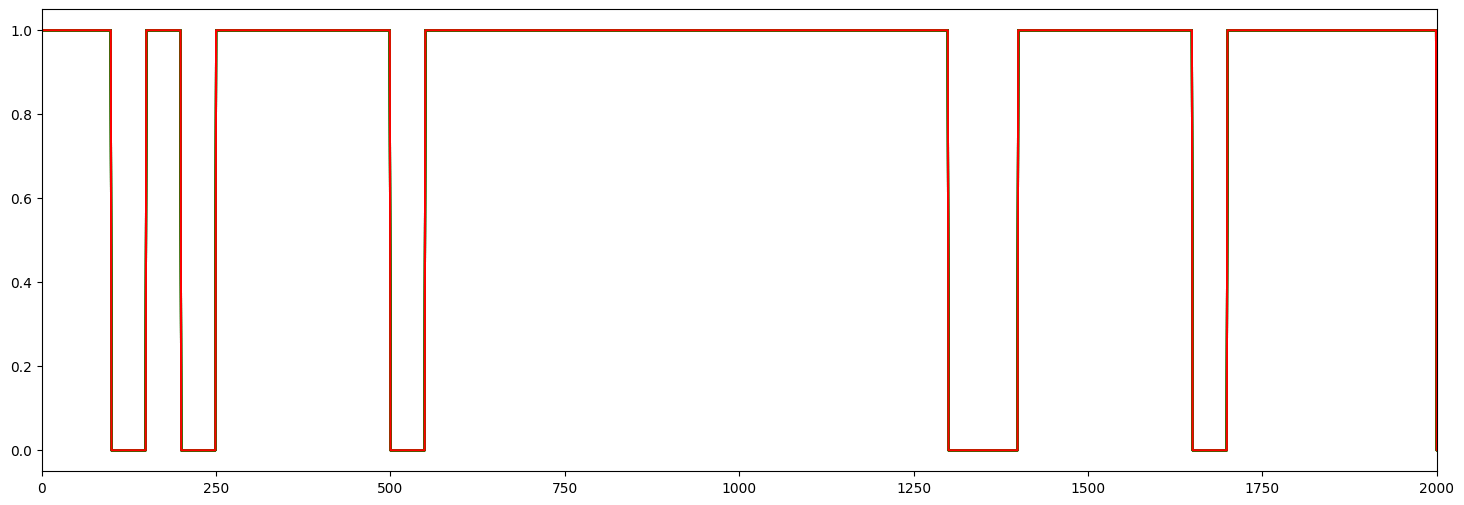

In [ ]:
# Convertir las salidas del modelo en valores binarios
resultado_umbralizado = (resultado > 0.1).astype(int)

# Visualizar los resultados umbralizados
plt.figure(figsize=(18, 6))
plt.plot(resultado_umbralizado, 'g')
plt.plot(message1, 'r')
plt.xlim(0, 2000)
plt.show()
